**Import Modul Standar**

In [1]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=34dba99dd963b84b8319a69c151c96e5083cfb514012dc3fb82524c0550cf990
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
import numpy as np
import pandas as pd
import plotly 
import chart_studio.plotly
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Kurs_Transaksi_USD.csv')
df.head(5)

,Kurs Jual,Kurs Beli,Tanggal
0,9171.0,9079.0,1/2/2012 12:00:00 AM
1,9206.0,9114.0,1/3/2012 12:00:00 AM
2,9226.0,9134.0,1/4/2012 12:00:00 AM
3,9209.0,9117.0,1/5/2012 12:00:00 AM
4,9206.0,9114.0,1/6/2012 12:00:00 AM


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kurs Jual  2549 non-null   float64
 1   Kurs Beli  2549 non-null   float64
 2   Tanggal    2549 non-null   object 
dtypes: float64(2), object(1)
memory usage: 59.9+ KB


In [5]:
len(df)

2549

In [6]:
# merubah tipe data object to datetime
df['Tanggal'] = df['Tanggal'].astype('datetime64')

# melihat tipe data dataframe
print(df.dtypes)

Kurs Jual           float64
Kurs Beli           float64
Tanggal      datetime64[ns]
dtype: object


In [7]:
print('waktu terawal dari kolom Tanggal adalah:', df['Tanggal'].min())
df.head()

waktu terawal dari kolom Tanggal adalah: 2012-01-02 00:00:00


,Kurs Jual,Kurs Beli,Tanggal
0,9171.0,9079.0,2012-01-02
1,9206.0,9114.0,2012-01-03
2,9226.0,9134.0,2012-01-04
3,9209.0,9117.0,2012-01-05
4,9206.0,9114.0,2012-01-06


In [8]:
# mengurutkan data berdasarkan waktu
df.sort_values('Tanggal', inplace=True, ignore_index=True)
df.head()

,Kurs Jual,Kurs Beli,Tanggal
0,9171.0,9079.0,2012-01-02
1,9206.0,9114.0,2012-01-03
2,9226.0,9134.0,2012-01-04
3,9209.0,9117.0,2012-01-05
4,9206.0,9114.0,2012-01-06


**Plot Data df**

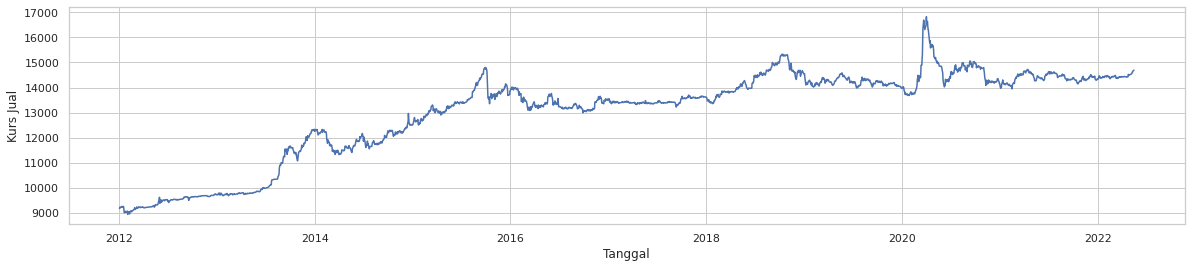

In [9]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df, x='Tanggal', y='Kurs Jual')

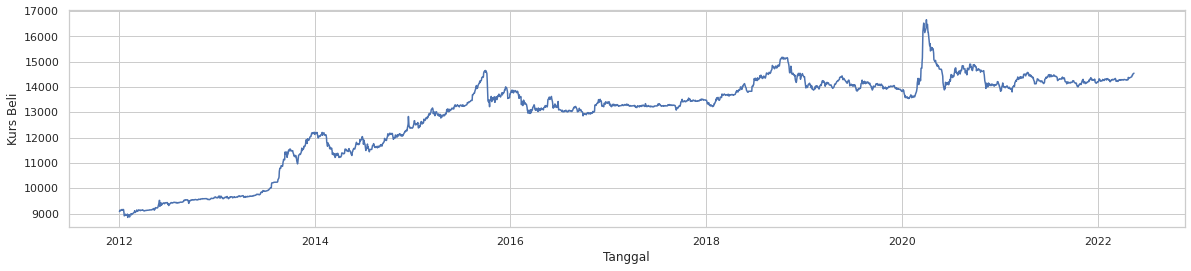

In [10]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df, x='Tanggal', y='Kurs Beli')

In [11]:
df1 = df[-24*365:].reset_index(drop=True)
df1.head()


,Kurs Jual,Kurs Beli,Tanggal
0,9171.0,9079.0,2012-01-02
1,9206.0,9114.0,2012-01-03
2,9226.0,9134.0,2012-01-04
3,9209.0,9117.0,2012-01-05
4,9206.0,9114.0,2012-01-06


**Plot Data df1**

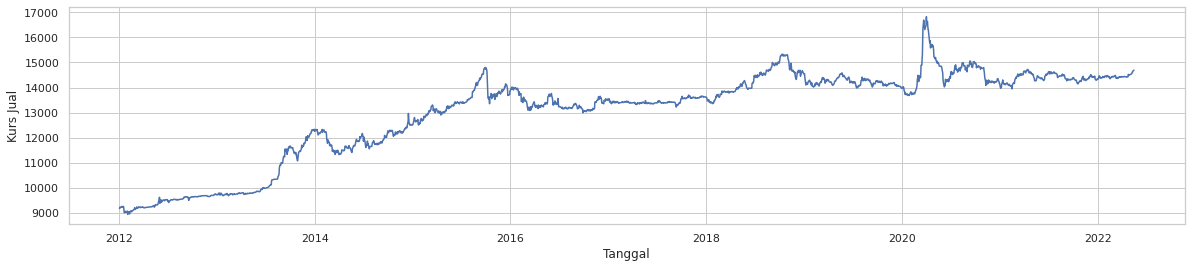

In [12]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df1, x='Tanggal', y='Kurs Jual')

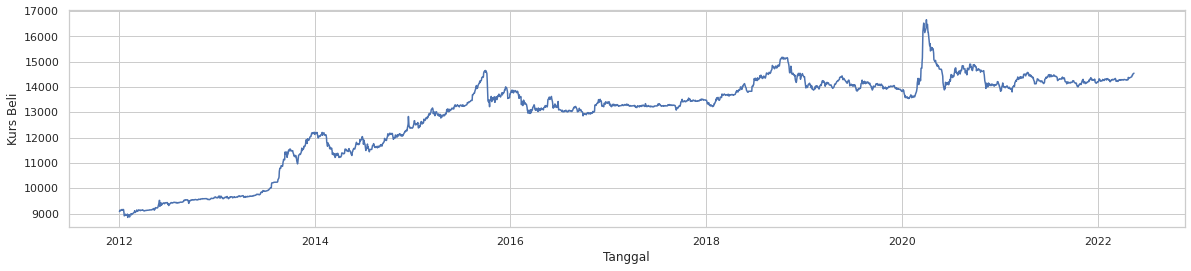

In [13]:
plt.figure(figsize=(20,4))
sns.lineplot(data=df1, x='Tanggal', y='Kurs Beli')

In [14]:
df1.describe()

,Kurs Jual,Kurs Beli
count,2549.000000,2549.000000
mean,13026.413393,12896.763115
std,1740.284052,1722.953623
min,8936.000000,8848.000000
25%,12141.000000,12021.000000
50%,13543.000000,13409.000000
75%,14302.000000,14160.000000
max,16824.710000,16657.300000


**Split Data**

In [15]:
# split data
train_size = int(len(df1) * 0.7) # Menentukan banyaknya data train yaitu sebesar 70% data
train = df1[:train_size]
test =df1[train_size:].reset_index(drop=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Kurs Jual']])

train['scaled'] = scaler.transform(train[['Kurs Jual']])
test['scaled'] = scaler.transform(test[['Kurs Jual']])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Kurs Beli']])

train['scaled'] = scaler.transform(train[['Kurs Beli']])
test['scaled'] = scaler.transform(test[['Kurs Beli']])

In [18]:
train.head()

,Kurs Jual,Kurs Beli,Tanggal,scaled
0,9171.0,9079.0,2012-01-02,0.036499
1,9206.0,9114.0,2012-01-03,0.042029
2,9226.0,9134.0,2012-01-04,0.045189
3,9209.0,9117.0,2012-01-05,0.042503
4,9206.0,9114.0,2012-01-06,0.042029


In [19]:
def sliding_window(data, window_size):
    sub_seq, next_values = [], []
    for i in range(len(data)-window_size):
        sub_seq.append(data[i:i+window_size])
        next_values.append(data[i+window_size])
    X = np.stack(sub_seq)
    y = np.array(next_values)
    return X,y

In [20]:
window_size = 24

X_train, y_train = sliding_window(train[['scaled']].values, window_size)
X_test, y_test = sliding_window(test[['scaled']].values, window_size)

In [21]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1760, 24, 1) (1760, 1)
(741, 24, 1) (741, 1)


**Model Forecasting Menggunakan LSTM**

**1. Import Modul**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM #, RNN, GRU 

**2. Membuat Fungsi Model Forecasting Menggunakan LSTM**

In [23]:
def create_model(LSTM_unit=64, dropout=0.2): #jika ingin menggunakan RNN atau GRU ganti LSTM dengan GRU/RNN
    # create model
    model = Sequential()
    model.add(LSTM(units=LSTM_unit, input_shape=(window_size, 1)))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

**3. Membuat Model**

In [24]:
LSTM_unit = [16,32,64,128]
dropout = [0.1,0.2]

In [25]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
# Early Stopping
es = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5, verbose = 0)

# create model
model = KerasRegressor(build_fn=create_model, epochs=50, validation_split=0.1, batch_size=32, callbacks=[es], verbose=1)

# define the grid search parameters
LSTM_unit = [16,32,64,128]
dropout=[0.1,0.2]
param_grid = dict(LSTM_unit=LSTM_unit, dropout=dropout)

**4. Membuat Variabel GridSearchCV**

In [26]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)

**5. Training Model dengan GridSearchCV**

In [27]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/50
50/50 [==============================] - 3s 23ms/step - loss: 0.1295 - mae: 0.2643 - val_loss: 0.0451 - val_mae: 0.2082
Epoch 2/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0088 - mae: 0.0733 - val_loss: 0.0057 - val_mae: 0.0671
Epoch 3/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0055 - mae: 0.0544 - val_loss: 0.0049 - val_mae: 0.0617
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0049 - mae: 0.0512 - val_loss: 0.0028 - val_mae: 0.0438
Epoch 5/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0049 - mae: 0.0510 - val_loss: 0.0031 - val_mae: 0.0471
Epoch 6/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0048 - mae: 0.0503 - val_loss: 0.0030 - val_mae: 0.0466
Epoch 7/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0043 - mae: 0.0469 - val_loss: 0.0025 - val_mae: 0.0421
Epoch 8/50
50/50 [==============================] - 1s 13ms/step - loss: 0.0041 - m

**6. Melihat Hasil Parameter Terbaik**

In [28]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mengambil model terbaik
best_model = grid_result.best_estimator_.model

Best: -0.000615 using {'LSTM_unit': 32, 'dropout': 0.1}
-0.001769 (0.001960) with: {'LSTM_unit': 16, 'dropout': 0.1}
-0.000817 (0.000558) with: {'LSTM_unit': 16, 'dropout': 0.2}
-0.000615 (0.000321) with: {'LSTM_unit': 32, 'dropout': 0.1}
-0.001135 (0.000893) with: {'LSTM_unit': 32, 'dropout': 0.2}
-0.000837 (0.000612) with: {'LSTM_unit': 64, 'dropout': 0.1}
-0.001311 (0.000892) with: {'LSTM_unit': 64, 'dropout': 0.2}
-0.000748 (0.000348) with: {'LSTM_unit': 128, 'dropout': 0.1}
-0.001725 (0.001859) with: {'LSTM_unit': 128, 'dropout': 0.2}


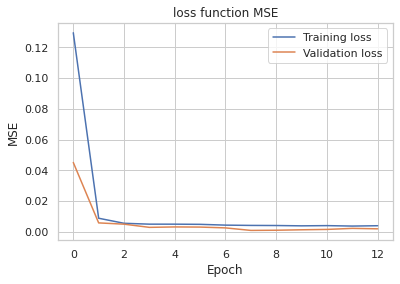

In [29]:
history = best_model.history
# grafik loss function MSE

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('loss function MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend()

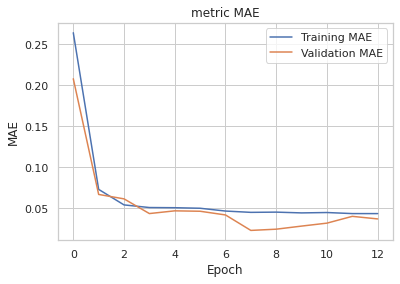

In [30]:
# grafik metric MAE

plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('metric MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()

**7. Evaluasi Model**

In [31]:
# Prediksi data train
predict_train = scaler.inverse_transform(best_model.predict(X_train))
true_train = scaler.inverse_transform(y_train)

# Prediksi data test
predict_test = scaler.inverse_transform(best_model.predict(X_test))
true_test = scaler.inverse_transform(y_test)

**Plot prediksi data train**

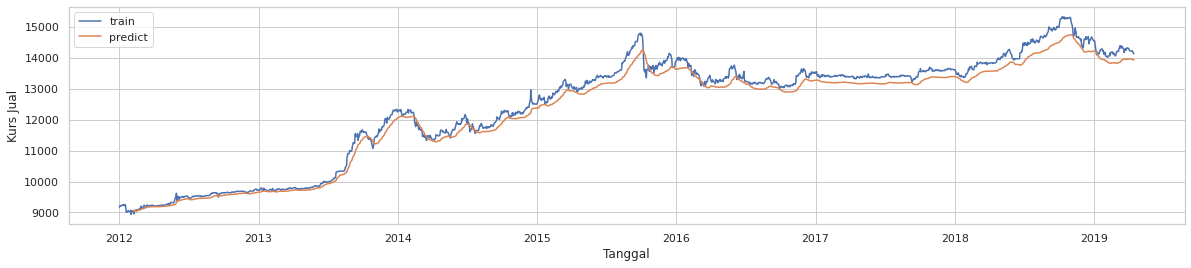

In [32]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(20,4))
sns.lineplot(data=train, x='Tanggal', y='Kurs Jual', label = 'train')
sns.lineplot(data=train, x='Tanggal', y='predict', label = 'predict')

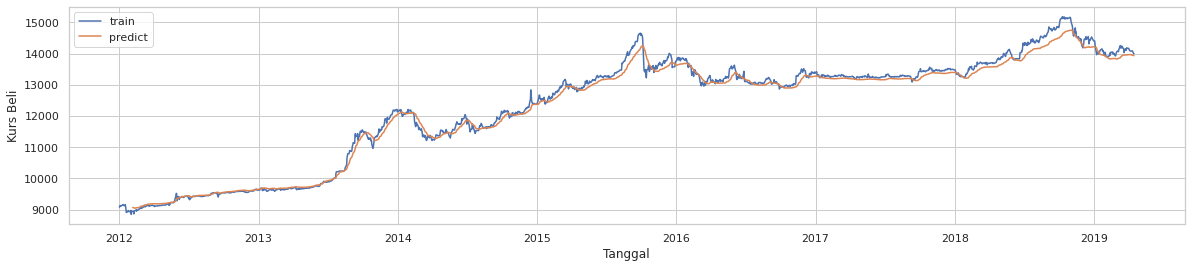

In [33]:
train['predict'] = np.nan
train['predict'][-len(predict_train):] = predict_train[:,0]

plt.figure(figsize=(20,4))
sns.lineplot(data=train, x='Tanggal', y='Kurs Beli', label = 'train')
sns.lineplot(data=train, x='Tanggal', y='predict', label = 'predict')

**Plot prediksi data test**

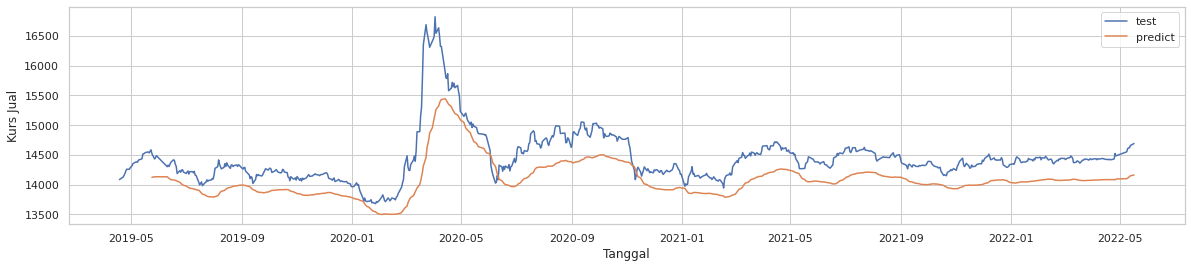

In [34]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(20,4))
sns.lineplot(data=test, x='Tanggal', y='Kurs Jual', label = 'test')
sns.lineplot(data=test, x='Tanggal', y='predict', label = 'predict')

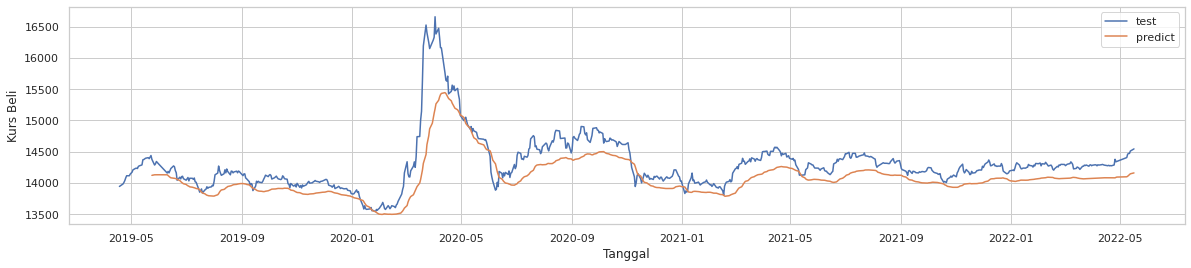

In [35]:
test['predict'] = np.nan
test['predict'][-len(predict_test):] = predict_test[:,0]

plt.figure(figsize=(20,4))
sns.lineplot(data=test, x='Tanggal', y='Kurs Beli', label = 'test')
sns.lineplot(data=test, x='Tanggal', y='predict', label = 'predict')

**Plot prediksi data test sebulan terakhir**

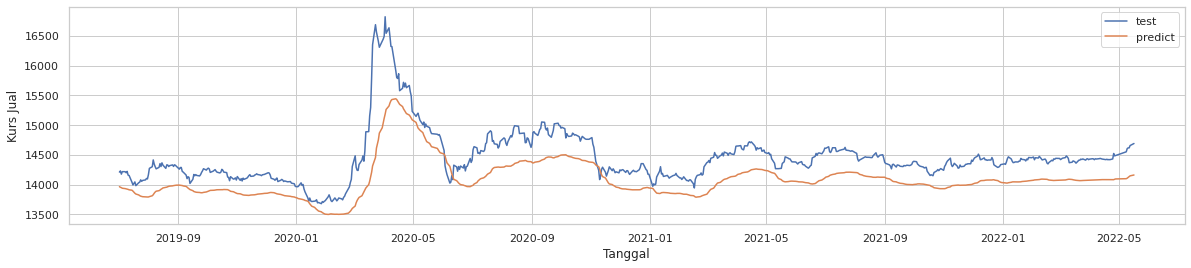

In [36]:
plt.figure(figsize=(20,4))
sns.lineplot(data=test[-24*30:], x='Tanggal', y='Kurs Jual', label = 'test')
sns.lineplot(data=test[-24*30:], x='Tanggal', y='predict', label = 'predict')

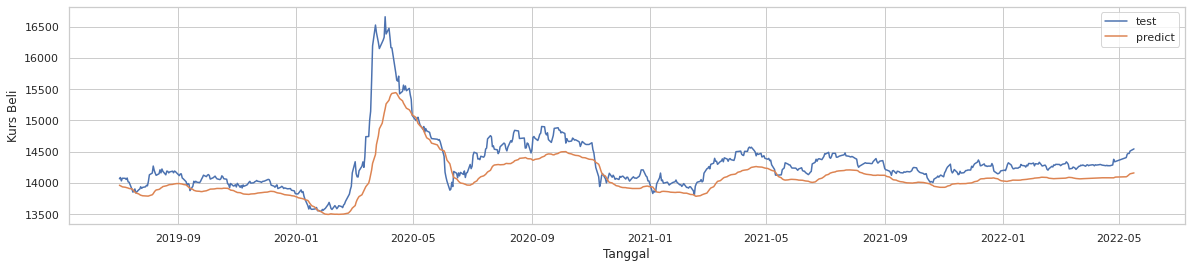

In [37]:
plt.figure(figsize=(20,4))
sns.lineplot(data=test[-24*30:], x='Tanggal', y='Kurs Beli', label = 'test')
sns.lineplot(data=test[-24*30:], x='Tanggal', y='predict', label = 'predict')

**Forecasting**

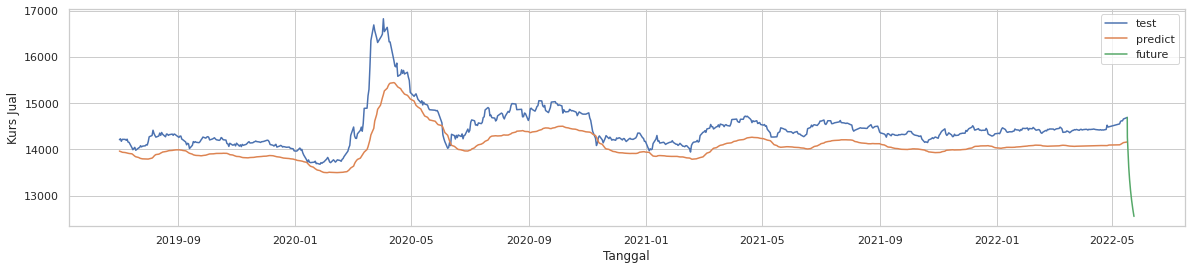

In [38]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['Kurs Jual']])
n_future = 24*7
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['Tanggal'].values[-1], periods=n_future+1, freq='H')
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(20,4))
sns.lineplot(data=test[-24*30:], x='Tanggal', y='Kurs Jual', label = 'test')
sns.lineplot(data=test[-24*30:], x='Tanggal', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Kurs Jual');


In [39]:
import joblib

In [40]:
# save model
joblib.dump((model,scaler), "kurs-jual-USD-forecasting-using-LSTM.pkl")

['kurs-jual-USD-forecasting-using-LSTM.pkl']

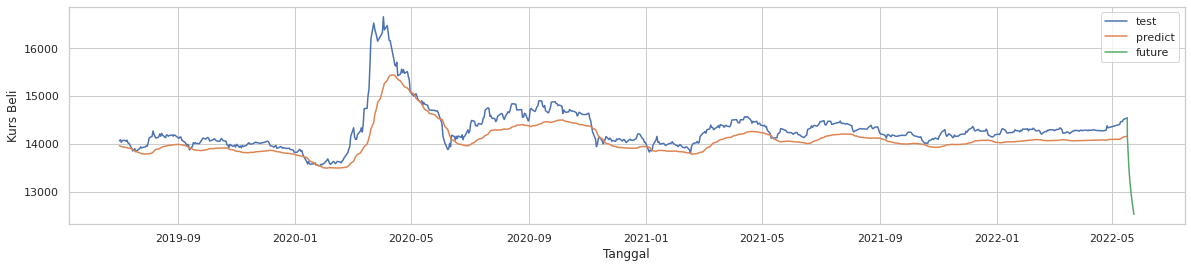

In [41]:
# forecasting data selanjutnya
y_test = scaler.transform(test[['Kurs Beli']])
n_future = 24*7
future = [[y_test[-1,0]]]
X_new = y_test[-window_size:,0].tolist()

for i in range(n_future):
    y_future = best_model.predict(np.array([X_new]).reshape(1,window_size,1))
    future.append([y_future[0,0]])
    X_new = X_new[1:]
    X_new.append(y_future[0,0])

future = scaler.inverse_transform(np.array(future))
date_future = pd.date_range(start=test['Tanggal'].values[-1], periods=n_future+1, freq='H')
# Plot Data sebulan terakhir dan seminggu ke depan
plt.figure(figsize=(20,4))
sns.lineplot(data=test[-24*30:], x='Tanggal', y='Kurs Beli', label = 'test')
sns.lineplot(data=test[-24*30:], x='Tanggal', y='predict', label = 'predict')
sns.lineplot(x=date_future, y=future[:,0], label = 'future')
plt.ylabel('Kurs Beli');

In [42]:
# save model
joblib.dump((model,scaler), "kurs-beli-USD-forecasting-using-LSTM.pkl")

['kurs-beli-USD-forecasting-using-LSTM.pkl']